# **Water Quality Analysis**

# Phase-1 Document Submission

## Objectives
* Bivariate and multiveriate data analysis
* Correlation analysis
* Preprocessing: missing value, train-test split and normalization
* Modelling : Decision Tree and Random Forest Classifiers
* Visualize Decision Tree
* Random Forest Hyperparameter Tuning

## Introduction
* Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
* Drinking water and staying hydrated is associated with a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore, drinking water is essential for good heart health.
* Water is the most important nutrient for the body. It has many benefits for your health and helps to protect you from illness and disease. Water is also an essential part of a healthy lifestyle.

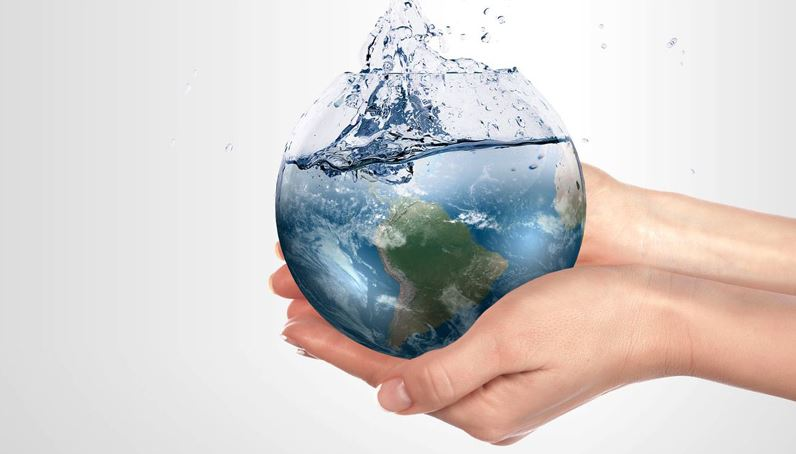


## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Dependent Variable Analysis](#4)
1. [Correlation Between Features](#5)
1. [Distribution of Features](#6)
1. [Preprocessing: Missing Value Problem](#7)
1. [Preprocessing: Train-Test Split and Normalization](#8)
1. [Modelling: Decision Tree and Random Forest Classifiers](#9)
1. [Visualize Decision Tree](#10)
1. [Random Forest Hyperparameter Tuning](#11)
1. [Conclusion](#12)

<a id="1"></a>
## Python Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree
 

<a id="2"></a>
## Data Content
1. **pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. **Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. **Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

<a id ="3"></a>
## Read and Analyse Data

In [ ]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [ ]:
df.head()

In [ ]:
# describe
df.describe()

In [ ]:
df.info()

<a id="4"></a>
## Dependent Variable Analysis

In [ ]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "count", names = ["Not Potable","Potable"], hole = 0.35, opacity=0.8,
            labels = {"label":"Potability", "Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

<a id = "5"></a>
## Correlation Between Features

In [ ]:
df.corr()

In [ ]:
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), figsize=(9,10), annot=True, linewidths = 0.8)
plt.show()

<a id="6"></a>
## Distribution of Features

In [ ]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

<a id="7"></a>
## Preprocessing: Missing Value Problem

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
# handle missing value with average of features
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [ ]:
df.isnull().sum()

<a id ="8"></a>
## Preprocessing: Train-Test Split and Normalization

In [ ]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

In [ ]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)

<a id = "9"></a>
## Modelling: Decision Tree and Random Forest Classifiers

In [ ]:
models = [("DTC", DecisionTreeClassifier(max_depth = 3)),
         ("RF", RandomForestClassifier())]

In [ ]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) #train
    model_result = model.predict(X_test) #prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    
    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults
    

In [ ]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot=True, linewidths = 0.8, fmt=".1f")
    plt.title(name)
    plt.show()

<a id="10"></a>
## Visualize Decision Tree

In [ ]:
dt_clf = models[0][1]

In [ ]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf, feature_names = df.columns.tolist()[:-1], class_names=["0","1"] ,filled=True)
plt.show()

<a id="11"></a>
## Random Forest Hyperparameter Tuning

In [ ]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }
    
}
model_params

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10)
    rs.fit(X,y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_])
scores

<a id="12"></a>
## Conclusion


In conclusion, the development of an integrated water quality analysis system, as presented in this study, addresses the critical need for efficient monitoring and management of our precious water resources. By combining advanced sensor technologies, data processing algorithms, and visualization tools, the system provides a holistic approach to understanding and ensuring the safety of water bodies. The modular design of the system offers flexibility and adaptability, making it applicable to diverse environmental settings and varying water quality challenges.